In [ ]:
import matplotlib.pyplot as plt
import torch

from gbi_diff.dataset.dataset import SBIDataset
from gbi_diff.model.lit_module import SBI
from gbi_diff.utils.criterion import SBICriterion


Text(0.5, 0.98, 'Criterion: Neg Cosine Similarity')

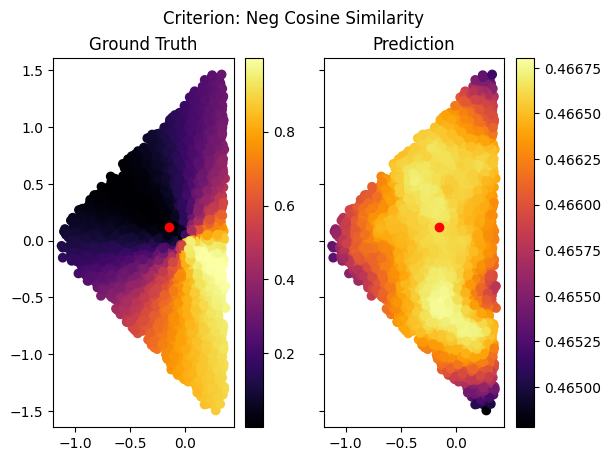

In [20]:
model = SBI.load_from_checkpoint(
    "results/lightning_logs/version_30/epoch=79-step=320.ckpt"
)

dataset = SBIDataset.from_file("data/moon_10000.pt")
dataset.set_n_target(10000)

theta, x, x_target = dataset[0]
theta = theta[None]
x = x[None]
x_target = x_target[None]

y_hat = model.forward(theta, x_target)
criterion = SBICriterion()
y = criterion.sample_distance(x, x_target)


z = torch.linalg.norm(x, dim=-1) * torch.linalg.norm(x_target, dim=-1)
similarity = (x * x_target).sum(dim=-1) / z
distance = (1 - similarity) / 2


fig, ax = plt.subplots(ncols=2, sharey=True)
mapable = ax[0].scatter(*x_target.squeeze().T, c=distance.squeeze(), cmap="inferno")
ax[0].scatter(*x.squeeze(), c="r")
fig.colorbar(mappable=mapable, ax=ax[0])
mapable = ax[1].scatter(
    *x_target.squeeze().T, c=y_hat.squeeze().detach(), cmap="inferno"
)
ax[1].scatter(*x.squeeze(), c="r")
fig.colorbar(mappable=mapable, ax=ax[1])

ax[0].set_title("Ground Truth")
ax[1].set_title("Prediction")
fig.suptitle("Criterion: Neg Cosine Similarity")

Text(0.5, 0.98, 'Criterion: L2-Norm')

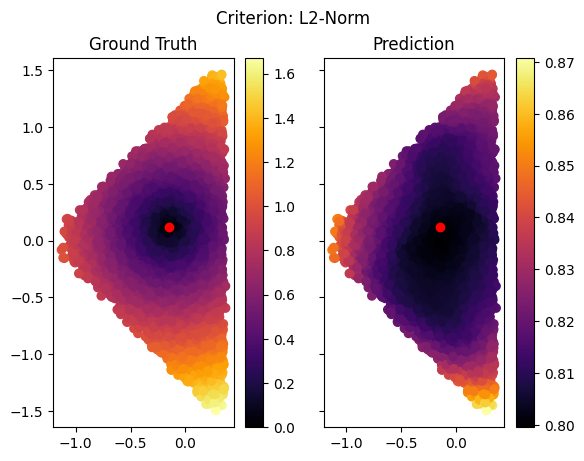

In [21]:
model = SBI.load_from_checkpoint("results/lightning_logs/version_31/epoch=54-step=220.ckpt")
dataset = SBIDataset.from_file("data/moon_10000.pt")
dataset.set_n_target(10000)

theta, x, x_target = dataset[0]
theta = theta[None]
x = x[None]
x_target = x_target[None]

y_hat = model.forward(theta, x_target)
criterion = SBICriterion()
y = criterion.sample_distance(x, x_target)


difference = x[:, None] - x_target
distance = torch.linalg.norm(difference, ord=2, dim=-1)


fig, ax = plt.subplots(ncols=2, sharey=True)
mapable = ax[0].scatter(*x_target.squeeze().T, c=distance.squeeze(), cmap="inferno")
ax[0].scatter(*x.squeeze(), c="r")
fig.colorbar(mappable=mapable, ax=ax[0])
mapable = ax[1].scatter(*x_target.squeeze().T, c=y_hat.squeeze().detach(), cmap="inferno")
ax[1].scatter(*x.squeeze(), c="r")
fig.colorbar(mappable=mapable, ax=ax[1])

ax[0].set_title("Ground Truth")
ax[1].set_title("Prediction")
fig.suptitle("Criterion: L2-Norm")

Text(0.5, 0.98, 'Criterion: L2-Norm')

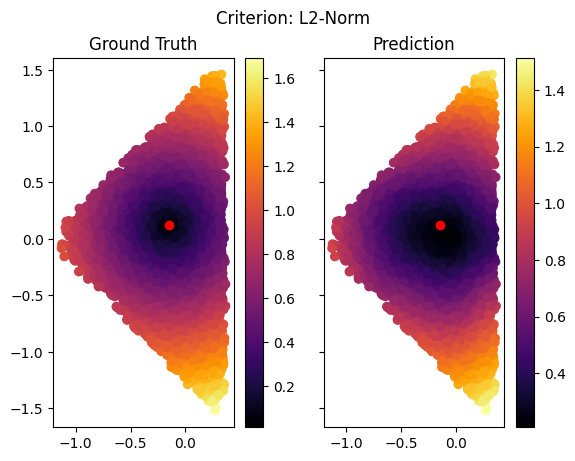

In [23]:
model = SBI.load_from_checkpoint("results/lightning_logs/version_34/epoch=99-step=400.ckpt")
dataset = SBIDataset.from_file("data/moon_10000.pt")
dataset.set_n_target(10000)

theta, x, x_target = dataset[0]
theta = theta[None]
x = x[None]
x_target = x_target[None]

y_hat = model.forward(theta, x_target)
criterion = SBICriterion()
y = criterion.sample_distance(x, x_target)


difference = x[:, None] - x_target
distance = torch.linalg.norm(difference, ord=2, dim=-1)


fig, ax = plt.subplots(ncols=2, sharey=True)
mapable = ax[0].scatter(*x_target.squeeze().T, c=distance.squeeze(), cmap="inferno")
ax[0].scatter(*x.squeeze(), c="r")
fig.colorbar(mappable=mapable, ax=ax[0])
mapable = ax[1].scatter(*x_target.squeeze().T, c=y_hat.squeeze().detach(), cmap="inferno")
ax[1].scatter(*x.squeeze(), c="r")
fig.colorbar(mappable=mapable, ax=ax[1])

ax[0].set_title("Ground Truth")
ax[1].set_title("Prediction")
fig.suptitle("Criterion: L2-Norm")